In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Import Data

In [2]:
path = 'lalonde.csv'
patients_df = pd.DataFrame.from_csv(path, sep=",")
patients_df.head()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
id,,,,,,,,,,
NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


### Clean Data

In [3]:
# Cast values to numeric
patients_df.apply(pd.to_numeric, errors = 'coerce')
type(patients_df.iloc[1,1])

numpy.int64

### Split not treated and treated

In [4]:
# splits a dataframe on a two-categorical column by values
def split_in_two(df, column):
    first = df[df[column] == 0]
    second = df[df[column] == 1]
    return first, second

In [5]:
ntreated_df, treated_df = split_in_two(patients_df, 'treat')
treated_df.tail(2)

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
id,,,,,,,,,,
NSW184,1,35,8,1,0,1,1,13732.07,17976.15,3786.628
NSW185,1,33,11,1,0,1,1,14660.71,25142.24,4181.942


In [6]:
ntreated_df.head(2)

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
id,,,,,,,,,,
PSID1,0,30,12,0,0,1,0,20166.73,18347.23,25564.67
PSID2,0,26,12,0,0,1,0,25862.32,17806.55,25564.67


### 1. A naive analysis

Now that we have the treated and untreated person, we can compare the outcome variable

In [7]:
ntreated_df['re78'].describe()

count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64

In [8]:
treated_df['re78'].describe()

count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

What happen if we take the max and min of the re74, re75 and re78

In [9]:
def get_min_max(df, first_col, last_col):
    values = df.loc[:, first_col:last_col]
    min_value = values.min().min()
    max_value = values.max().max()
    return min_value, max_value

In [10]:
min_re, max_re = get_min_max(patients_df, 're74', 're78')
max_re

60307.93

We can see that's it's smaller than the re78 (re78 has the most max)

Now we will compare them with plots

In [11]:
def get_column_serie(df, column):
    return df[[column]].values[:, 0]

In [12]:
def create_bins(min_val, max_val, interval):
    bins_ = []
    for i in range(int(min_val), int(max_val), interval):
        bins_.append(i)
    return bins_

In [13]:
cut_range = 2000
bins_ = create_bins(min_re, max_re, cut_range)

In [14]:
def make_comparative_histogram(df1, df2, column, bins_param, xlabel, legends):
    serie1 = get_column_serie(df1, column)
    serie2 = get_column_serie(df2, column)
    
    plt.hist([serie1, serie2], bins=bins_param,  edgecolor="k")
    plt.xlabel(xlabel)
    plt.legend(legends)
    plt.show()

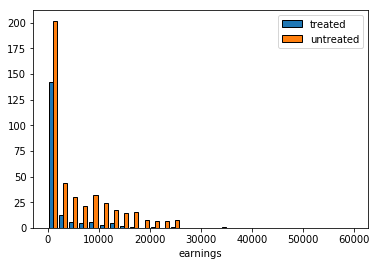

In [15]:
make_comparative_histogram(treated_df, ntreated_df, 're74', bins_, 'earnings', ['treated', 'untreated'])


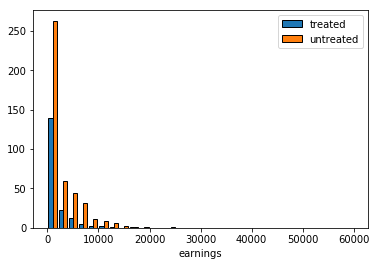

In [16]:
make_comparative_histogram(treated_df, ntreated_df, 're75', bins_, 'earnings', ['treated', 'untreated'])

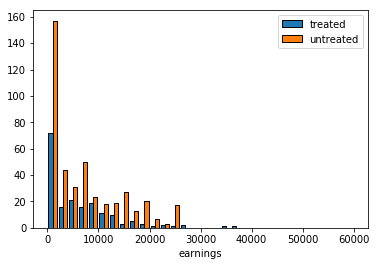

In [17]:
make_comparative_histogram(treated_df, ntreated_df, 're78', bins_, 'earnings', ['treated', 'untreated'])

Here the naive analysis might conclude that the treatment doesn't work. We can conclude this because the average income of the not treated group is always higher than the treated group.

### 2. A closer look at the data

We will now compare the real income values and this time use all the data that we can have (ages and education level) However, the race, marriage and treatment does not make much sens for the comparison but we will try to analyse it.

In [18]:
def shared_plot_by(col,plot_kind):
    fig, axs = plt.subplots(1, 2, figsize=(14,5), sharex=True)
    ntreated_df.plot(y=[col], kind=plot_kind, ax=axs[0])
    treated_df.plot(y=[col], kind=plot_kind, ax=axs[1])
    plt.show()

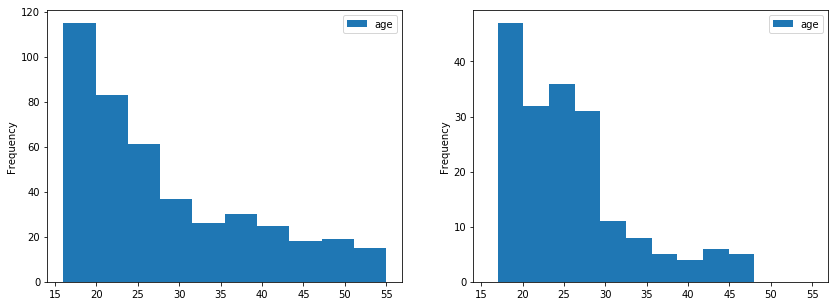

In [19]:
# First we can compare them by age
shared_plot_by('age', 'hist')

In [20]:
# And we can compare the values with descibe
treated_df['age'].describe()

count    185.000000
mean      25.816216
std        7.155019
min       17.000000
25%       20.000000
50%       25.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64

In [21]:
ntreated_df['age'].describe()

count    429.000000
mean      28.030303
std       10.786653
min       16.000000
25%       19.000000
50%       25.000000
75%       35.000000
max       55.000000
Name: age, dtype: float64

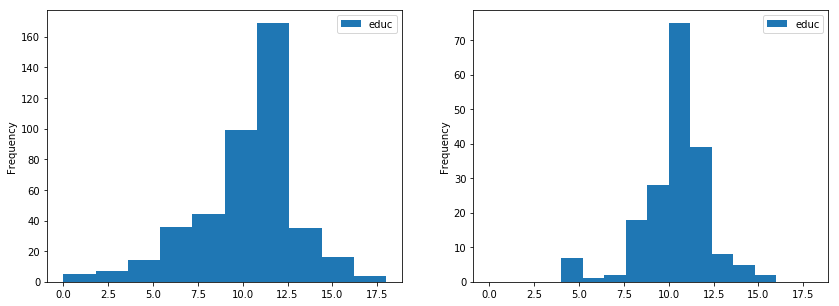

In [22]:
# Then by education
shared_plot_by('educ', 'hist')

In [23]:
# and compare their values too
treated_df['educ'].describe()

count    185.000000
mean      10.345946
std        2.010650
min        4.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       16.000000
Name: educ, dtype: float64

In [24]:
ntreated_df['educ'].describe()

count    429.000000
mean      10.235431
std        2.855238
min        0.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       18.000000
Name: educ, dtype: float64

Now for the the race, marriage and node degree we just have values 0 and 1 so we count them and can plot them all together to see the differencies

In [25]:
def col_number(df, col_names):
    result_0 = []
    result_1 = []
    
    for col_name in col_names:   
        # for each col we calculate the length and then store the ratio
        nb_0 = len(df[df[col_name] == 0])
        nb_1 = len(df[df[col_name] == 1])
        result_0.append(nb_0 / (nb_0 + nb_1))
        result_1.append(nb_1 / (nb_0 + nb_1))
        
    return np.asarray(result_0), np.asarray(result_1)

def bar_subplot(axe_plot, nb_index, result_0, result_1, ylegend):
    plot0 = axe_plot.bar(nb_index, result_0, color="#0000ff")
    plot1 = axe_plot.bar(nb_index, result_1, bottom = result_0, color='#ff3333')

    plt.sca(axe_plot)
    plt.xticks(nb_index, col_names)
    plt.ylabel(ylegend)
    plt.yticks( [0, 0.5, 1] )
    plt.legend((plot0[0], plot1[0]), ('0', '1'))

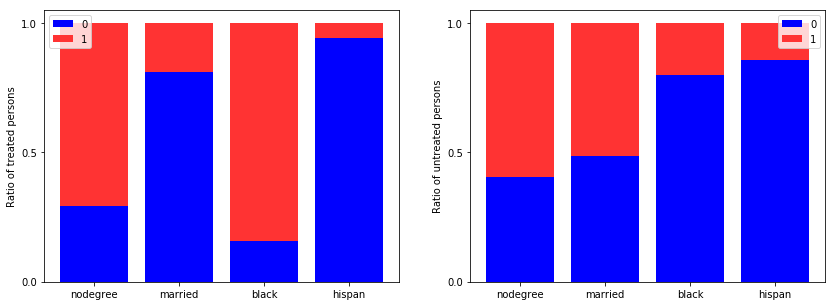

In [26]:
fig, plot_axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)
nb_index = np.arange(4)
col_names = ['nodegree', 'married', 'black', 'hispan']

result_0, result_1 = col_number(treated_df, col_names)
bar_subplot(plot_axes[0], nb_index, result_0, result_1, 'Ratio of treated persons')

result_0, result_1 = col_number(ntreated_df, col_names)
bar_subplot(plot_axes[1], nb_index, result_0, result_1, 'Ratio of untreated persons')

plt.show()

CONCLUSION : ...